In [5]:
# !pip install pandas_datareader

In [6]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [7]:
print(pyu.ps2("pandas"))

pandas==2.2.3



[*********************100%***********************]  1 of 1 completed


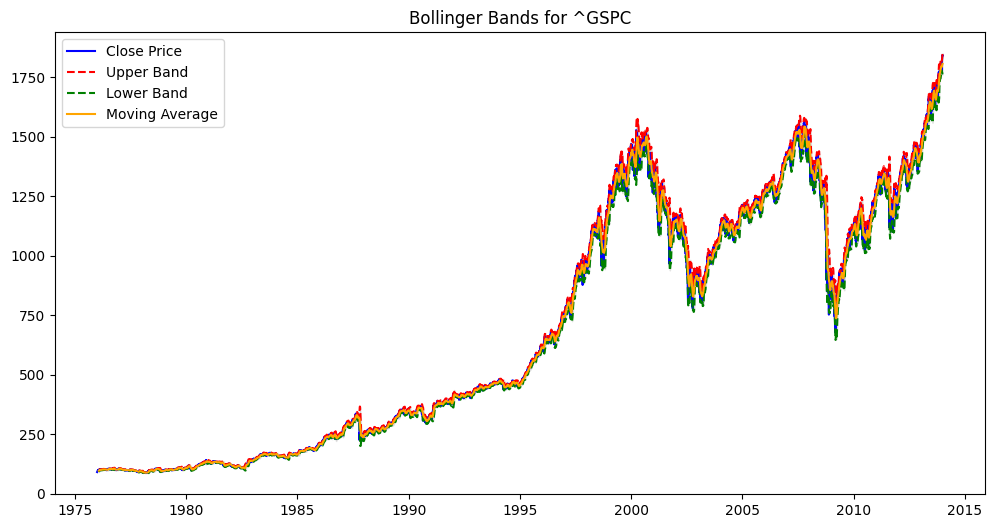

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download data
start = "1976-01-01"
end = "2013-12-31"
symbol = "^GSPC"  # S&P 500

# Download historical data
data = yf.download(symbol, start=start, end=end)

# Step 2: Define a function to calculate Bollinger Bands
def bollinger_bands(price, window=20, num_sd=2):
    rolling_mean = price['Close'].rolling(window=window).mean()
    rolling_std = price['Close'].rolling(window=window).std()
    
    price['Upper Band'] = rolling_mean + (rolling_std * num_sd)
    price['Lower Band'] = rolling_mean - (rolling_std * num_sd)
    price['Moving Average'] = rolling_mean

    return price

# Apply the function
data = bollinger_bands(data)

# Step 3: Plot the data with Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='--')
plt.plot(data['Moving Average'], label='Moving Average', color='orange')
plt.fill_between(data.index, data['Lower Band'], data['Upper Band'], color='gray', alpha=0.2)
plt.title(f'Bollinger Bands for {symbol}')
plt.legend(loc='best')
plt.show()